In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
DATA_JSON_FILE='../jupyter/environment/SpamData/01_Processing/email-text-data.json'

In [3]:
data=pd.read_json(DATA_JSON_FILE)

In [4]:
data

,file_name,MESSAGE,CATEGORY
0,00086.9c945bb90f76a8b76331599106c28429,<TABLE borderColorDark=#0000cc width=700 align...,1
1,00222.77293b7002c5749b9d31a99b2f4e0366,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
2,00167.af33a21e8b279ee28d5e70a6ef1dc86a,<HTML><HEAD><TITLE></TITLE><META http-equiv=3D...,1
3,00198.aad7df5b8be674a0ce09c8040ef53f1e,------=_NextPart_000_00B4_26B74D8A.B2187A61\n\...,1
4,00129.1080cea3a532759b015dc071d033749d,Removal instructions below\n\n\n\n\n\nI saw yo...,1
...,...,...,...
5791,01345.c40d5798193a4a060ec9f3d2321e37e4,\n\nSecurityFocus Linux Newsletter #92\n\n----...,0
5792,00030.cc523265aefc37ee6ce3015d8ff6aa24,"Hi, \n\nI'm looking to build a completely sile...",0
5793,01179.1aeec6e94d2829c1dd756d3609a8eccf,"On Tue, 30 Jul 2002 22:22:24 +0200, ""Manfred G...",0
5794,00382.713b028c6bb68b50a180e6d71e604b5b,"On Tue, Aug 13, 2002 at 10:04:55AM +0100, Padr...",0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer=CountVectorizer(stop_words='english')

In [8]:
all_features=vectorizer.fit_transform(data.MESSAGE)

In [9]:
all_features.shape

(5796, 102694)

In [10]:
vectorizer.vocabulary_

{'table': 86120,
 'bordercolordark': 24585,
 '0000cc': 48,
 'width': 95488,
 '700': 11064,
 'align': 18634,
 'center': 27405,
 'bgcolor': 23297,
 'ffffff': 41323,
 'bordercolorlight': 24586,
 '000000': 4,
 'border': 24581,
 'tbody': 86462,
 'tr': 88442,
 'td': 86548,
 'div': 34529,
 'h3': 46263,
 'hot': 48223,
 'tawnee': 86412,
 'internet': 52404,
 'sensation': 81206,
 'ready': 76638,
 'bare': 22422,
 'br': 24813,
 'looking': 59228,
 'font': 42257,
 'color': 29367,
 '0000ff': 53,
 'firm': 41690,
 'tits': 87736,
 'creamy': 30950,
 'soft': 83080,
 'thighs': 87316,
 'help': 47200,
 'instant': 52197,
 'erection': 39033,
 'sister': 82277,
 'tori': 88228,
 'joined': 54667,
 'sweet': 85437,
 'little': 58765,
 'honeys': 48090,
 'love': 59334,
 'good': 45236,
 'time': 87625,
 'click': 28719,
 'visit': 92921,
 'size': 82347,
 'href': 48390,
 'http': 48497,
 'lightspeed': 58488,
 'd2g': 31894,
 'com': 29405,
 'ff0000': 41235,
 'tawneestone': 86413,
 'posing': 72561,
 'erotic': 39091,
 'ways': 943

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     all_features, data.CATEGORY, test_size=0.3, random_state=88)

In [15]:
X_train.shape

(4057, 102694)

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
classifier=MultinomialNB()

In [18]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [20]:
yHat=classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay


In [22]:
print(classification_report(y_test,yHat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1185
           1       0.99      0.84      0.91       554

    accuracy                           0.95      1739
   macro avg       0.96      0.92      0.94      1739
weighted avg       0.95      0.95      0.94      1739



In [23]:
cm=confusion_matrix(y_test,yHat)

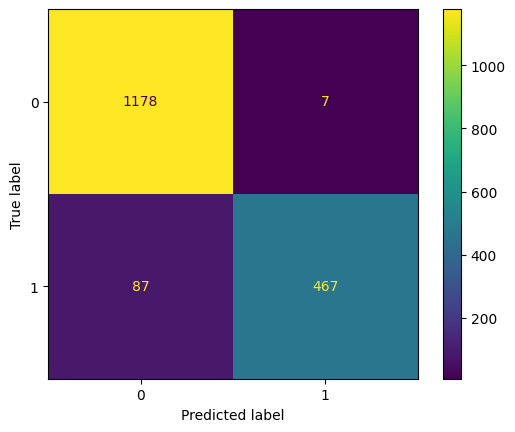

In [25]:
ConfusionMatrixDisplay(cm).plot()